First 5 Rows:
  Order_ID Customer_ID   Age Payment_Mode  Order_Date   Price  Quantity  \
0  ORD1000     CUST229  19.0          NaN  2023-11-05   28.95        10   
1  ORD1001     CUST507  49.0   Debit Card  2023-03-23  412.09         6   
2  ORD1002     CUST366   NaN   Debit Card  2023-10-22  419.37         9   
3  ORD1003     CUST965   NaN   Debit Card  2023-08-31  263.88         5   
4  ORD1004     CUST211  65.0       PayPal  2023-04-06  287.59         3   

          City Category Gender  
0     New York    Books  Other  
1      Phoenix     Home   Male  
2      Chicago    Books  Other  
3      Chicago     Home   Male  
4  Los Angeles     Home  Other  

Data Info:
<class 'pandas.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order_ID      1250 non-null   str    
 1   Customer_ID   1250 non-null   str    
 2   Age           652 non-null    float64
 3   Payment_M

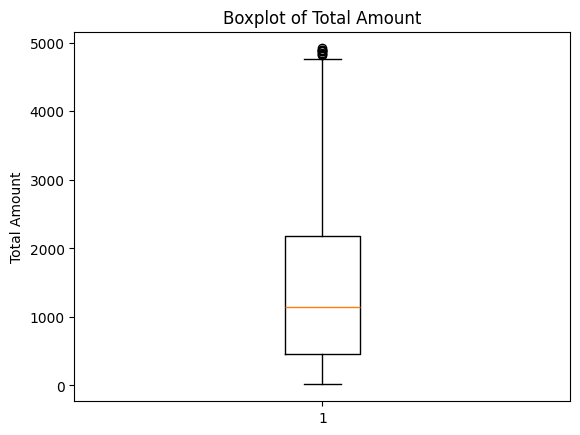

Data Cleaning Completed. File saved as cleaned_orders.csv


In [ ]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import dataset and inspect first few rows
df = pd.read_csv("ecommerce-orders.csv")

print("First 5 Rows:")
print(df.head())

# Step 2: Display data info and descriptive statistics
print("\nData Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

# Step 3: Handle missing values

# Replace missing Age with mean age
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Replace missing Payment_Mode with "Not Specified"
df['Payment_Mode'] = df['Payment_Mode'].fillna("Not Specified")

# Step 4: Remove duplicate rows
df = df.drop_duplicates()

# Step 5: Convert Order_Date to datetime and extract Month
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Month'] = df['Order_Date'].dt.month

# Step 6: Create new column Total_Amount = Price * Quantity
df['Total_Amount'] = df['Price'] * df['Quantity']

# Step 7: Detect outliers using boxplot
plt.figure()
plt.boxplot(df['Total_Amount'])
plt.title("Boxplot of Total Amount")
plt.ylabel("Total Amount")
plt.show()

# Step 8: Save cleaned dataset
df.to_csv("cleaned_orders.csv", index=False)

print("Data Cleaning Completed. File saved as cleaned_orders.csv")
